In [33]:
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [34]:
zipcode2 = pd.read_csv('zip_lookup2.csv')

caopm252015 = pd.read_csv(
    'CA_pm2.5 2015.csv',
    index_col='Date',
    parse_dates=['Date'])

caopm252016 = pd.read_csv(
    'CA_pm2.5 2016.csv',
    index_col='Date',
    parse_dates=['Date'])

caopm252017 = pd.read_csv(
    'CA_pm2.5 2017.csv',
    index_col='Date',
    parse_dates=['Date'])

caopm252018 = pd.read_csv(
    'CA_pm2.5 2018.csv',
    index_col='Date',
    parse_dates=['Date'])

In [35]:
caopm252015['Daily Mean PM2.5 Concentration'].describe()  # negative value for pm2.5 concentration in 2015, min -5.400000
caopm252016['Daily Mean PM2.5 Concentration'].describe()  # negative value for pm2.5 concentration in 2016 min -5.500000
caopm252017['Daily Mean PM2.5 Concentration'].describe()  # negative value for pm2.5 concentration in 2017 min -5.500000
caopm252018['Daily Mean PM2.5 Concentration'].describe()  # negative value for pm2.5 concentration in 2018 min -7.200000
#replace negative values to 0
caopm252015.loc[caopm252015['Daily Mean PM2.5 Concentration'] < 0, 'Daily Mean PM2.5 Concentration'] = 0
caopm252016.loc[caopm252016['Daily Mean PM2.5 Concentration'] < 0, 'Daily Mean PM2.5 Concentration'] = 0
caopm252017.loc[caopm252017['Daily Mean PM2.5 Concentration'] < 0, 'Daily Mean PM2.5 Concentration'] = 0
caopm252018.loc[caopm252018['Daily Mean PM2.5 Concentration'] < 0, 'Daily Mean PM2.5 Concentration'] = 0

In [36]:
# merge 2015-2018 dataset
frames2 = [caopm252015, caopm252016, caopm252017, caopm252018]
capm25 = pd.concat(frames2)
capm25 # 198447 rows × 19 columns
# select six counties we want
pm25county = capm25.loc[capm25.COUNTY.isin(['Los Angeles', 'Orange', 'Ventura', 'San Bernardino', 'Riverside', 'San Diego'])].sort_index()
pm25county  # 64956 rows × 19 columns
# assign zip code to monitor site in those six counties for each year of ozone df
result2 = pd.merge(pm25county.reset_index(), zipcode2, on=['SITE_LATITUDE', 'SITE_LONGITUDE'], how='left').set_index('Date')
# save to a new file
result2.to_csv('pm25byzip.csv')
# mean daily pm2.5 concentration by year and month
result2.groupby(by=[result2.index.year, result2.index.month])['Daily Mean PM2.5 Concentration'].mean()

Date  Date
2015  1       12.752751
      2       14.221159
      3        9.902285
      4       10.034867
      5       10.291150
      6       12.175943
      7       10.281591
      8       13.217226
      9       11.122231
      10       9.232997
      11       7.187893
      12       9.060417
2016  1       10.610167
      2        9.041463
      3       10.050698
      4        8.833804
      5        9.132637
      6       13.096781
      7       12.853476
      8       12.196768
      9       11.119583
      10       9.486064
      11       9.428519
      12      11.461686
2017  1        7.950476
      2        7.761000
      3        9.357832
      4        9.253698
      5       10.168937
      6       11.707652
      7       13.341543
      8       13.200222
      9       10.911765
      10      12.309496
      11      10.856176
      12      16.012809
2018  1       12.180838
      2        9.485958
      3        6.927782
      4       11.231364
      5        9.222800
     

Text(0, 0.5, 'PM2.5 (ug/m3 LC)')

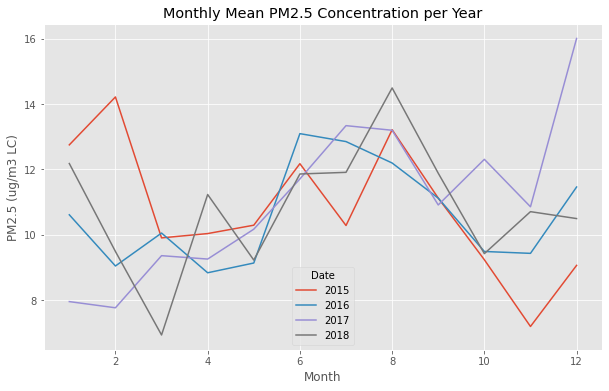

In [37]:
plt2 = pd.pivot_table(result2, index=result2.index.month, columns=result2.index.year,
                     values='Daily Mean PM2.5 Concentration', aggfunc='mean').plot()

plt2.set_title("Monthly Mean PM2.5 Concentration per Year")
plt2.set_xlabel('Month')
plt2.set_ylabel('PM2.5 (ug/m3 LC)')

In [38]:
# all data by zip, every site mean value per year, also noticed not every site's location has zip code
zipozonecounty2 = result2.groupby([result2.index.year, "COUNTY", 'Site ID', 'Site Name', 'zip'])
pd.set_option('display.max_rows', None)
zipozonecounty2['Daily Mean PM2.5 Concentration'].mean()


Date  COUNTY          Site ID   Site Name                                   zip       
2015  Los Angeles     60370002  Azusa                                       91702          9.891667
                      60370016  Glendora                                    91741         14.059889
                      60371103  Los Angeles-North Main Street               90012         14.502635
                      60371201  Reseda                                      91335         14.623182
                      60371302  Compton                                     90221         11.911712
                      60371602  Pico Rivera #2                              90660         11.483898
                      60372005  Pasadena                                    91106          9.816807
                      60374002  Long Beach (North)                          90807         10.889349
                      60374004  Long Beach (South)                          90806         12.040793
             

In [43]:
result2.head()
new2 = result2[['Daily Mean PM2.5 Concentration', 'zip']]
new2.head()
new2.groupby(by=[new2.index.year, new2.index.month, 'zip'])['Daily Mean PM2.5 Concentration'].mean()

Date  Date  zip       
2015  1     00000         11.810000
            90012         19.262667
            90221         22.910000
            90660         20.822222
            90805         20.621429
            90806         20.601961
            90807         18.577419
            91106         15.540000
            91321          7.496667
            91335         19.458333
            91360          7.661538
            91702         11.510000
            91741         14.522581
            91761         22.747059
            91785-9998    16.450000
            91901          5.667742
            91910         10.260000
            92027-2310    14.696429
            92051         11.887097
            92059          6.212903
            92071-4417    11.380000
            92113         13.203226
            92124          8.441176
            92173         16.300000
            92179          7.250000
            92201          8.188889
            92220          7.229032
     